In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
train = pd.read_csv("/content/drive/MyDrive/Carnival Wars Dataset/train.csv")
# test = pd.read_csv("/content/drive/MyDrive/Carnival Wars Dataset/test.csv")

## Exploratory Data Analysis

In [48]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [49]:
print(train.shape)
# print(test.shape)

(6368, 15)


In [50]:
def summary(Z):
    import pandas as pd
    typesofdata=pd.DataFrame(Z.dtypes)
    typesofdata.columns=["Type"]
    nullsofdata=pd.DataFrame(Z.isnull().sum())
    nullsofdata.columns=["Nulls"]
    datainthedf={"Nulls":nullsofdata.Nulls.values,"Type":typesofdata.Type.values}
    display(pd.DataFrame(datainthedf,index=nullsofdata.index))
    print('--------------------------------------------------------')
    for i in range(0,Z.columns.shape[0]):
        import pandas as pd
        if Z.dtypes[i]=='object':
            dataframe88=Z.groupby([Z.columns[i]]).count()
            allindex=dataframe88.iloc[:,1].index
            allvalue=dataframe88.iloc[:,1].values
            show=pd.DataFrame(allvalue,allindex)
            show.columns=[""]
            display(show)
            print('--------------------------------------------------------')
    display(Z.describe())

In [51]:
summary(train)

,Nulls,Type
Product_id,0,object
Stall_no,5,float64
instock_date,0,object
Market_Category,0,int64
Customer_name,211,object
Loyalty_customer,0,object
Product_Category,0,object
Grade,0,int64
Demand,0,int64
Discount_avail,38,float64


--------------------------------------------------------


,
Product_id,
ABQEJ7YQTNQGMXZV,1
ACBECFGT6YXGSNU4,1
ACBECFGT7MVYRRHJ,1
ACBECFGT9FTPGEDC,1
ACBECFGTEC5DXHPJ,1
...,...
WTCEGGTZEJQ2YRQG,1
WTDEDGHHBXMZB2HG,1
WTDEDGHHFSDQXYGD,1


--------------------------------------------------------


,
instock_date,
2014-02-21 06:07:06.000,1
2014-02-22 07:07:06.000,1
2014-02-24 10:30:21.000,1
2014-02-25 07:07:06.000,1
2014-02-25 10:30:21.000,1
...,...
2016-03-30 21:01:39.000,1
2016-03-30 21:01:46.000,1
2016-03-30 21:02:09.000,1


--------------------------------------------------------


,
Customer_name,
1,2
Aaden,1
Aadhya,1
Aaditya,1
Aadya,1
...,...
Zylan,1
Zylen,1
Zymere,1


--------------------------------------------------------


,
Loyalty_customer,
No,2479
Yes,3884


--------------------------------------------------------


,
Product_Category,
Child_care,658
Cosmetics,649
Educational,610
Fashion,603
Home_decor,616
Hospitality,631
Organic,619
Pet_care,682
Repair,675


--------------------------------------------------------


,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [52]:
# test_Product_id = test.Product_id

## Feature Engineering

In [53]:
train.drop(["Product_id", "Customer_name"],axis = 1,inplace=True)
# test.drop(["Product_id", "Customer_name"],axis = 1,inplace=True)

* Extracting informative data from instock_date column like month, dayofweek, weekofyear using pandas. 

In [54]:
train.instock_date = pd.to_datetime(train.instock_date)
# test.instock_date = pd.to_datetime(test.instock_date)

In [55]:
dayofweek = train.instock_date.dt.dayofweek
weekofyear = train.instock_date.dt.weekofyear
month = train.instock_date.dt.month
train['weekofyear'] = weekofyear
train['month'] = month
train['dayofweek'] = month

# dayofweek = test.instock_date.dt.dayofweek
# weekofyear = test.instock_date.dt.weekofyear
# month = test.instock_date.dt.month
# test['weekofyear'] = weekofyear
# test['month'] = month
# test['dayofweek'] = month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [56]:
train.drop(['instock_date'], axis = 1, inplace = True)
# test.drop(['instock_date'], axis = 1, inplace = True)

* Removing negative Selling_Price rows.

In [57]:
train = train[train.Selling_Price>=0]

In [ ]:
train = train.dropna(subset =["Selling_Price","Stall_no_count"])

## Dummification (Categorical columns)

In [58]:
train['Loyalty_customer'] = pd.get_dummies(train['Loyalty_customer'],drop_first=True)
train['Discount_avail'] = pd.get_dummies(train['Discount_avail'],drop_first=True)
train['Product_Category'] = pd.get_dummies(train['Product_Category'],drop_first=True)
train['Grade'] = pd.get_dummies(train['Grade'],drop_first=True)
train['charges_2 (%)'] = pd.get_dummies(train['charges_2 (%)'],drop_first=True)

# test['Loyalty_customer'] = pd.get_dummies(test['Loyalty_customer'],drop_first=True)
# test['Discount_avail'] = pd.get_dummies(test['Discount_avail'],drop_first=True)
# test['Product_Category'] = pd.get_dummies(test['Product_Category'],drop_first=True)
# test['Grade'] = pd.get_dummies(test['Grade'],drop_first=True)
# test['charges_2 (%)'] = pd.get_dummies(test['charges_2 (%)'],drop_first=True)


## Count Encoding

In [59]:
!pip install category_encoders

In [60]:
import category_encoders as ce

In [61]:
ce_col = ['Stall_no', 'Market_Category', 'Demand', 'weekofyear', 'month', 'dayofweek']

In [62]:
count_enc = ce.CountEncoder(drop_invariant=True)
count_encoded = count_enc.fit(train[ce_col])

train = train.join(count_encoded.transform(train[ce_col]).add_suffix("_count"))
# test = test.join(count_encoded.transform(test[ce_col]).add_suffix("_count"))

In [63]:
train.drop(ce_col, axis = 1, inplace= True)
# test.drop(ce_col, axis = 1, inplace= True)

In [64]:
train.head()

,Loyalty_customer,Product_Category,Grade,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Stall_no_count,Market_Category_count,Demand_count,weekofyear_count,month_count,dayofweek_count
0,1,0,1,0,376.0,0,2983.0,4713.0,4185.947700,37.0,2,68,34,8,8
1,1,0,0,0,397.0,0,7495.0,10352.0,9271.490256,38.0,24,51,12,3,3
2,1,0,0,0,250.0,0,5752.0,7309.0,6785.701362,9.0,447,10,34,8,8
3,1,0,0,0,144.0,0,5090.0,20814.0,13028.917824,50.0,23,48,13,3,3
4,1,0,1,1,211.0,0,2430.0,9261.0,906.553935,7.0,63,35,13,3,3


In [65]:
print(train.shape)
# print(test.shape)

(6313, 15)


## Visualization

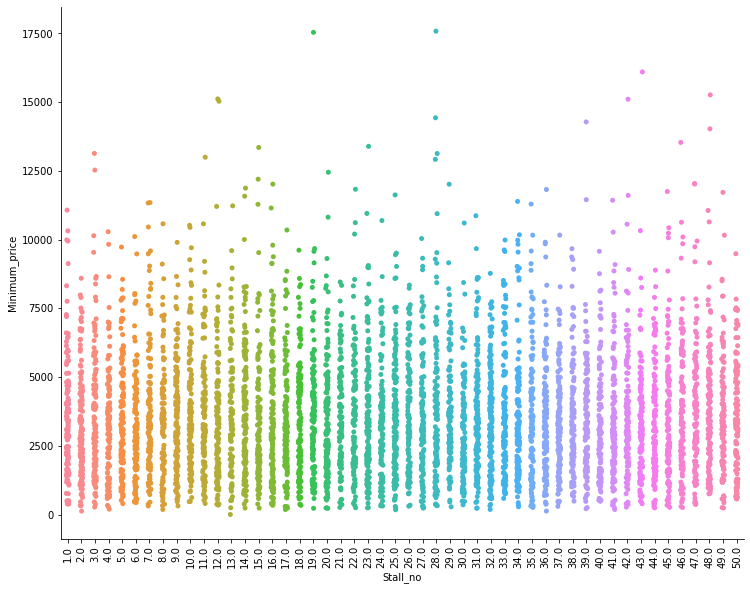

In [ ]:
g = sns.catplot(x="Stall_no", y="Minimum_price", data=train)

g.fig.set_figwidth(11.7)
g.fig.set_figheight(8.27)
g.set_xticklabels(rotation=90)

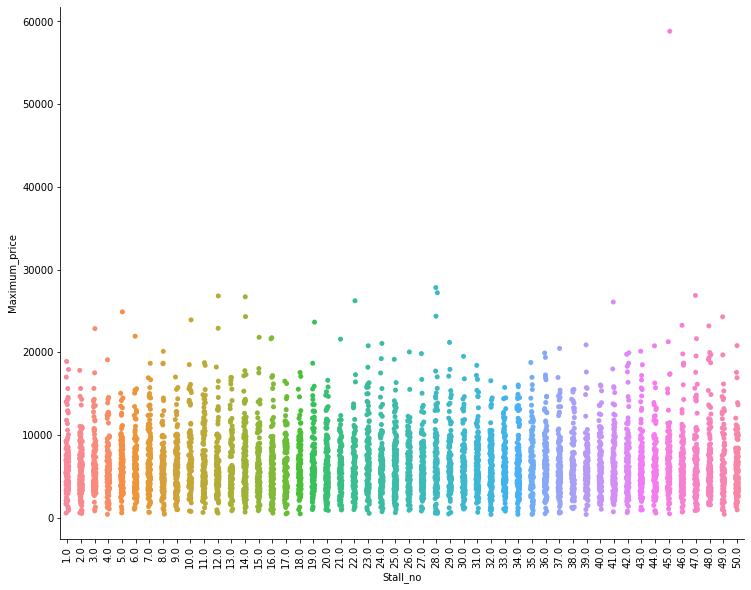

In [ ]:
g = sns.catplot(x="Stall_no", y="Maximum_price", data=train)

g.fig.set_figwidth(11.7)
g.fig.set_figheight(8.27)
g.set_xticklabels(rotation=90)

* One Data Point looks off from rest of the data points (Considering it as outlier and removing it from data set)

In [67]:
train = train[train.Maximum_price<30000]

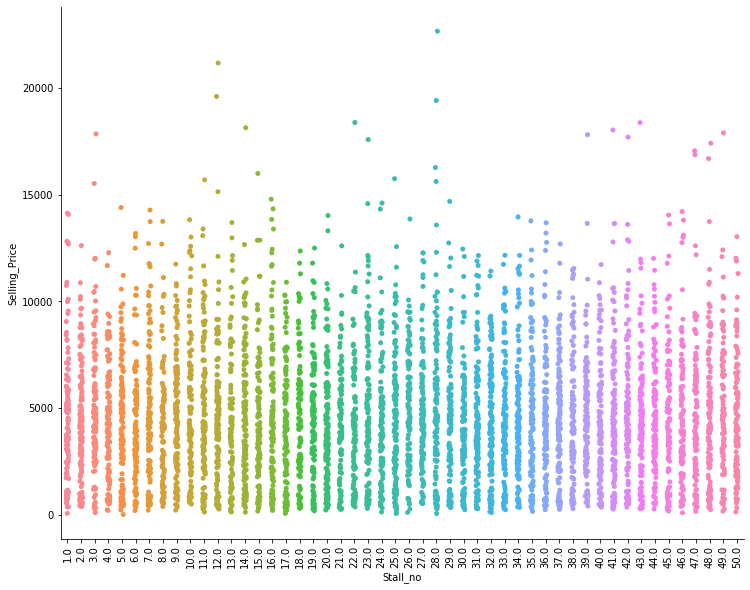

In [ ]:
g = sns.catplot(x="Stall_no", y="Selling_Price", data=train)

g.fig.set_figwidth(11.7)
g.fig.set_figheight(8.27)
g.set_xticklabels(rotation=90)

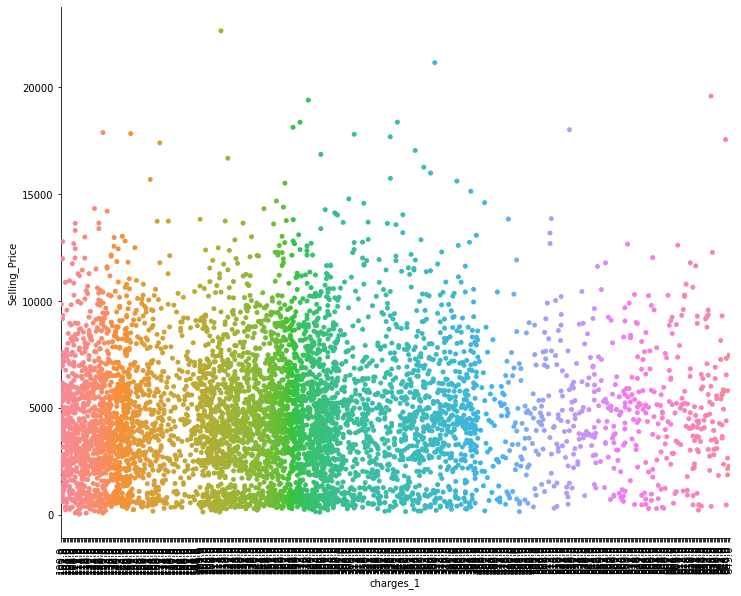

In [ ]:
g = sns.catplot(x="charges_1", y="Selling_Price", data=train)

g.fig.set_figwidth(11.7)
g.fig.set_figheight(8.27)
g.set_xticklabels(rotation=90)

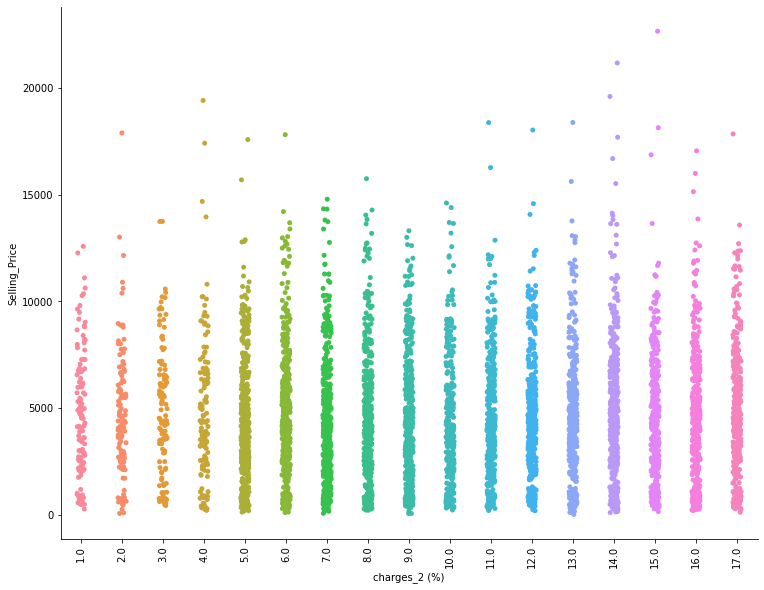

In [ ]:
g = sns.catplot(x="charges_2 (%)", y="Selling_Price", data=train)

g.fig.set_figwidth(11.7)
g.fig.set_figheight(8.27)
g.set_xticklabels(rotation=90)

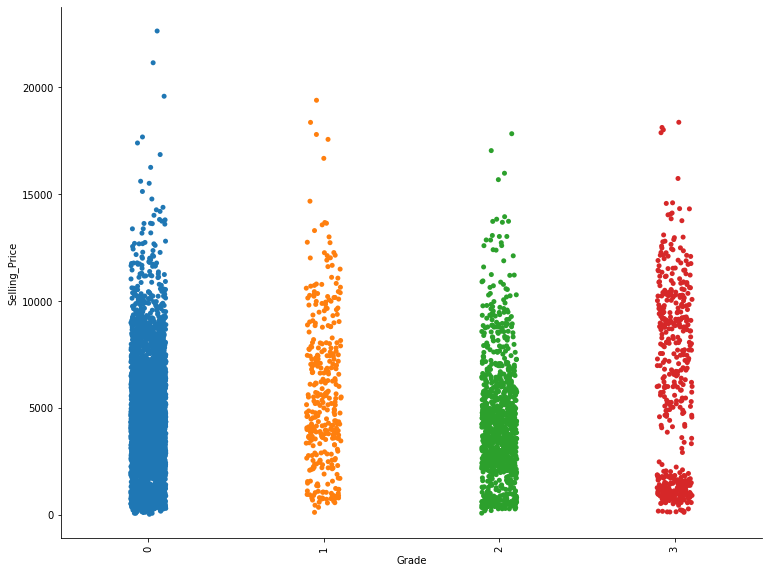

In [ ]:
g = sns.catplot(x="Grade", y="Selling_Price", data=train)

g.fig.set_figwidth(11.7)
g.fig.set_figheight(8.27)
g.set_xticklabels(rotation=90)

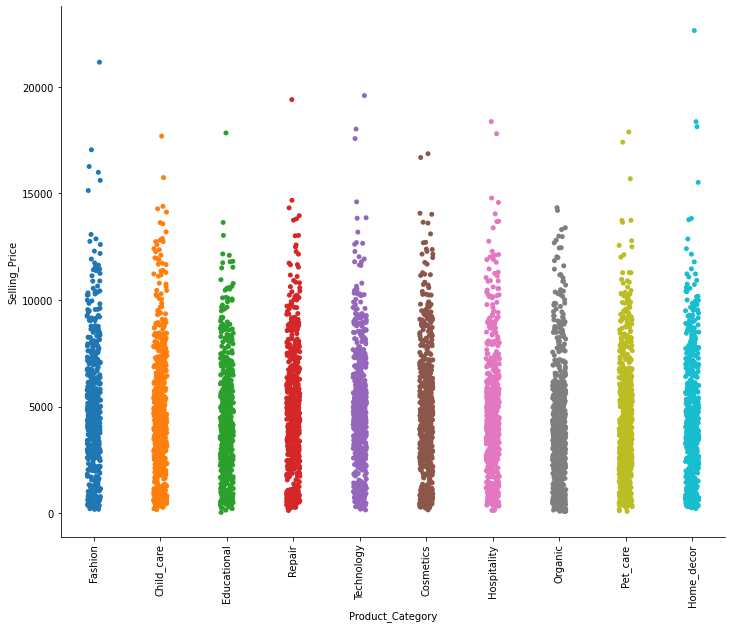

In [ ]:
g = sns.catplot(x="Product_Category", y="Selling_Price", data=train)

g.fig.set_figwidth(11.7)
g.fig.set_figheight(8.27)
g.set_xticklabels(rotation=90)

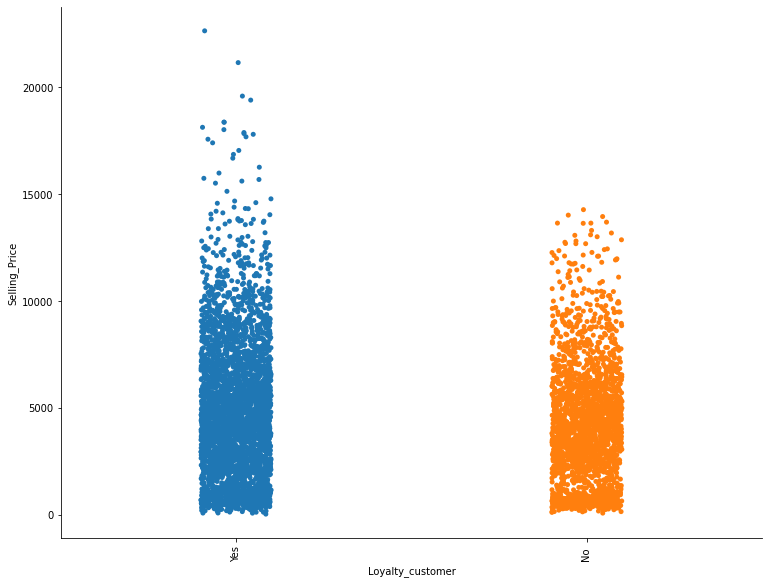

In [ ]:
g = sns.catplot(x="Loyalty_customer", y="Selling_Price", data=train)

g.fig.set_figwidth(11.7)
g.fig.set_figheight(8.27)
g.set_xticklabels(rotation=90)

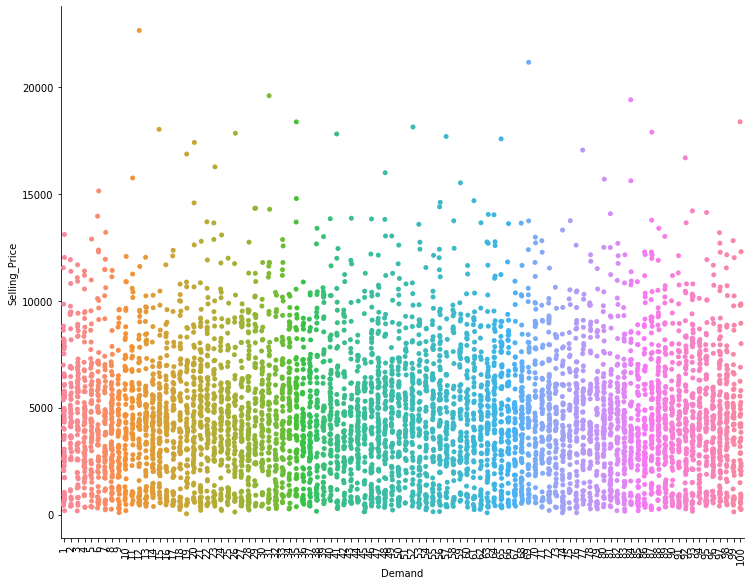

In [ ]:
g = sns.catplot(x="Demand", y="Selling_Price", data=train)

g.fig.set_figwidth(11.7)
g.fig.set_figheight(8.27)
g.set_xticklabels(rotation=90)

In [ ]:
def boxplot(col):
  sns.boxplot(y=X_train[col]).set_title(col+ " Box plot")


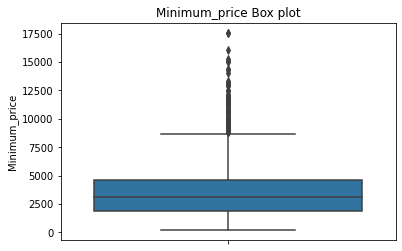

In [ ]:
boxplot("Minimum_price")

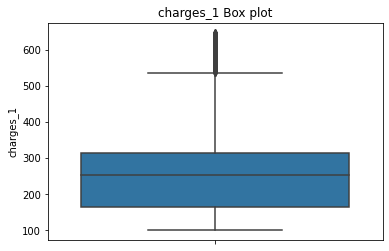

In [ ]:
boxplot("charges_1")

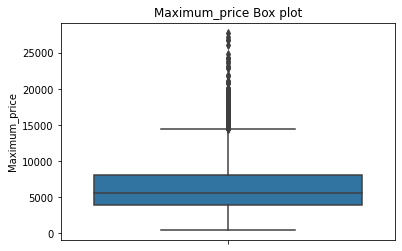

In [ ]:
boxplot("Maximum_price")

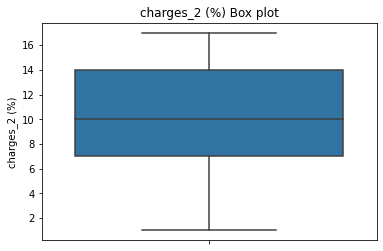

In [ ]:
boxplot("charges_2 (%)")

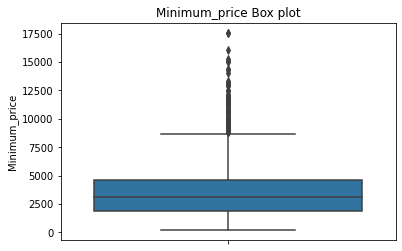

In [ ]:
boxplot("Minimum_price")

## Train Test Split

In [68]:
# X_train = train.drop(['Selling_Price'],axis = 1)
# y_train = train.Selling_Price

In [69]:
# X_test = test

In [70]:
X = train.drop(['Selling_Price'],axis = 1)
y = train.Selling_Price

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Imputation


In [72]:
X_train.Discount_avail.fillna(X_train.Discount_avail.median(),inplace=True)
X_train.charges_1.fillna(X_train.charges_1.mean(),inplace=True)
X_train['charges_2 (%)'].fillna(X_train['charges_2 (%)'].mean(),inplace=True)
X_train.Minimum_price.fillna(X_train.Minimum_price.mean(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [73]:
X_train.isnull().sum()

Loyalty_customer         0
Product_Category         0
Grade                    0
Discount_avail           0
charges_1                0
charges_2 (%)            0
Minimum_price            0
Maximum_price            0
Stall_no_count           0
Market_Category_count    0
Demand_count             0
weekofyear_count         0
month_count              0
dayofweek_count          0
dtype: int64

In [76]:
X_test.Discount_avail.fillna(X_train.Discount_avail.median(),inplace=True)
X_test.charges_1.fillna(X_train.charges_1.mean(),inplace=True)
X_test['charges_2 (%)'].fillna(X_train['charges_2 (%)'].mean(),inplace=True)
X_test.Minimum_price.fillna(X_train.Minimum_price.mean(),inplace=True)

X_test.Stall_no_count.fillna(X_train.Stall_no_count.median(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [78]:
X_test.isnull().sum()

Loyalty_customer         0
Product_Category         0
Grade                    0
Discount_avail           0
charges_1                0
charges_2 (%)            0
Minimum_price            0
Maximum_price            0
Stall_no_count           0
Market_Category_count    0
Demand_count             0
weekofyear_count         0
month_count              0
dayofweek_count          0
dtype: int64

## Model Building

### Simple Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [82]:
lin_score=r2_score(y_test, pred)
lin_score

0.9247167087161484

In [83]:
mae1 = mean_absolute_error(y_test, pred)

In [84]:
mse1 = mean_squared_error(y_test,pred)

In [85]:
print(mae1)
print(mse1)

423.7633106183208
656742.3238679555


### Lasso Regression

In [86]:
from sklearn.linear_model import Lasso

In [87]:
regLS=Lasso()

In [88]:
regLS.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
regLS.score(X_train,y_train)

0.9277614724539304

In [90]:
predictionsLS=regLS.predict(X_test)

In [91]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [92]:
mae2 = mean_absolute_error(y_test,predictionsLS)

In [93]:
mse2 = mean_squared_error(y_test,predictionsLS)

In [94]:
r2lasso = r2_score(y_test, predictionsLS)

In [95]:
print(mae2)
print(mse2)

423.10900028388374
657265.0543578613


### Decision Tree Regressor

In [96]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15, random_state=47,min_samples_leaf=4)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

In [97]:
dt_score=r2_score(y_test, dt_pred)
dt_score

0.9936513920499368

In [98]:
mae3 = mean_absolute_error(y_test,dt_pred)

In [99]:
mse3 = mean_squared_error(y_test,dt_pred)

In [100]:
print(mae3)
print(mse3)

127.30222420269662
55382.800982100904


### Random Forest Regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rfc = RandomForestRegressor(n_estimators=150, min_samples_leaf  = 2, random_state=123, max_depth=17)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [103]:
rfc

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=17, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [104]:
rf_score=r2_score(y_test, rfc_pred)
rf_score

0.9972799414769808

In [105]:
mae4 = mean_absolute_error(y_test,rfc_pred)

In [106]:
mse4 = mean_squared_error(y_test,rfc_pred)

In [107]:
print(mae4)
print(mse4)

71.87164980892716
23728.738807778773


### Light GBM Regressor

In [108]:
from lightgbm import LGBMRegressor

In [109]:
lgb = LGBMRegressor(n_estimators=300, learning_rate =0.02, random_state=123, max_depth=18)
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)

In [110]:
lgb

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.02, max_depth=18,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=300, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [111]:
lgb_score=r2_score(y_test, lgb_pred)
lgb_score

0.9972873605980336

In [112]:
mae5 = mean_absolute_error(y_test,lgb_pred)

In [113]:
mse5 = mean_squared_error(y_test,lgb_pred)

In [115]:
print(mae5)
print(mse5)

73.640410703313
23664.01726441723


### CatBoost Regressor

In [116]:
!pip install catboost

     |████████████████████████████████| 66.3MB 68kB/s 


In [117]:
from catboost import CatBoostRegressor

In [118]:
cat = CatBoostRegressor(random_state=40,n_estimators=1005)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)

Learning rate set to 0.04976
0:	learn: 2852.7360840	total: 49.1ms	remaining: 49.3s
1:	learn: 2734.7458734	total: 51.5ms	remaining: 25.8s
2:	learn: 2621.5258063	total: 53.7ms	remaining: 18s
3:	learn: 2512.3090380	total: 56ms	remaining: 14s
4:	learn: 2407.6120860	total: 58.4ms	remaining: 11.7s
5:	learn: 2309.0790563	total: 60.5ms	remaining: 10.1s
6:	learn: 2209.9350591	total: 62.8ms	remaining: 8.96s
7:	learn: 2117.2867285	total: 65.2ms	remaining: 8.12s
8:	learn: 2028.5170734	total: 67.2ms	remaining: 7.44s
9:	learn: 1946.6971894	total: 69.4ms	remaining: 6.91s
10:	learn: 1867.0856652	total: 71.8ms	remaining: 6.49s
11:	learn: 1792.3043618	total: 74.1ms	remaining: 6.13s
12:	learn: 1725.9174974	total: 76.3ms	remaining: 5.83s
13:	learn: 1662.0262008	total: 78.6ms	remaining: 5.56s
14:	learn: 1595.1706525	total: 80.9ms	remaining: 5.34s
15:	learn: 1529.4868466	total: 83.1ms	remaining: 5.14s
16:	learn: 1466.4559403	total: 85.2ms	remaining: 4.95s
17:	learn: 1405.8871562	total: 87.4ms	remaining: 4.7

In [119]:
cat_score=r2_score(y_test, cat_pred)
cat_score

0.9974565680241835

In [120]:
mae6 = mean_absolute_error(y_test,cat_pred)

In [121]:
mse6 = mean_squared_error(y_test,cat_pred)

In [122]:
print(mae6)
print(mse6)

59.39180101319526
22187.917105001536


### Voting Regressor

In [123]:
import numpy as np
from sklearn.ensemble import VotingRegressor

In [124]:
vr = VotingRegressor([('LightGBM', lgb), ('Catboost', cat),('Catboost1', cat),("DT",dt)], )

In [125]:
vr.fit(X_train,y_train)

Learning rate set to 0.04976
0:	learn: 2852.7360840	total: 3ms	remaining: 3.02s
1:	learn: 2734.7458734	total: 5.7ms	remaining: 2.86s
2:	learn: 2621.5258063	total: 10.7ms	remaining: 3.58s
3:	learn: 2512.3090380	total: 13ms	remaining: 3.26s
4:	learn: 2407.6120860	total: 15.3ms	remaining: 3.05s
5:	learn: 2309.0790563	total: 17.5ms	remaining: 2.92s
6:	learn: 2209.9350591	total: 19.8ms	remaining: 2.82s
7:	learn: 2117.2867285	total: 22ms	remaining: 2.74s
8:	learn: 2028.5170734	total: 24.2ms	remaining: 2.68s
9:	learn: 1946.6971894	total: 26.5ms	remaining: 2.63s
10:	learn: 1867.0856652	total: 28.8ms	remaining: 2.6s
11:	learn: 1792.3043618	total: 31.1ms	remaining: 2.57s
12:	learn: 1725.9174974	total: 33.6ms	remaining: 2.56s
13:	learn: 1662.0262008	total: 35.8ms	remaining: 2.53s
14:	learn: 1595.1706525	total: 38.1ms	remaining: 2.51s
15:	learn: 1529.4868466	total: 40.3ms	remaining: 2.49s
16:	learn: 1466.4559403	total: 42.5ms	remaining: 2.47s
17:	learn: 1405.8871562	total: 44.7ms	remaining: 2.45s


VotingRegressor(estimators=[('LightGBM',
                             LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.02, max_depth=18,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=300,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=123,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent=True, sub...
                             <catboost.core.CatBoostRegressor object at 0x7f5562c6b828>),
                            ('DT',
 

In [126]:
vr_pred = vr.predict(X_test)

In [127]:
vr_score =r2_score(y_test, vr_pred)
vr_score

0.9978397037042935

In [128]:
mae7 = mean_absolute_error(y_test,vr_pred)

In [129]:
mse7 = mean_squared_error(y_test,vr_pred)

In [130]:
print(mae7)
print(mse7)

58.57500350275129
18845.589576261467


In [131]:
print("Linear Regression Score: ",round(lin_score*100,ndigits=2) , "%" )
print("Decision Tree Regressor Score: ",round(dt_score*100,ndigits=2) , "%" )
print("Random Forest Regressor Score: ",round(rf_score*100,ndigits=2) , "%" )
print("Light GBM Regression Score: ",round(lgb_score*100,ndigits=2) , "%" )
print("Cat Boost Regression Score: ",round(cat_score*100,ndigits=2) , "%" )


Linear Regression Score:  92.47 %
Decision Tree Regressor Score:  99.37 %
Random Forest Regressor Score:  99.73 %
Light GBM Regression Score:  99.73 %
Cat Boost Regression Score:  99.75 %


In [132]:
scores=list([lin_score*100,r2lasso*100,dt_score*100,rf_score*100,lgb_score*100,cat_score*100,vr_score*100])

In [133]:
mse_all = [mse1,mse2,mse3,mse4,mse5,mse6,mse7]

In [134]:
mae_all = [mae1,mae2,mae3,mae4,mae5,mae6,mae7]

In [135]:
technique=['Linear Regressor','Lasso Regressor', 'Decision Tree Regressor', 'RandomForest Regressor','Light GBM Regressor','CatBoost Regressor','Voting Regressor']

In [136]:
df_score = pd.DataFrame([technique,scores,mse_all,mae_all]).T
df_score.columns = ["Algorithm","R2","MSE","MAE"]

In [137]:
df_score

,Algorithm,R2,MSE,MAE
0,Linear Regressor,92.4717,656742,423.763
1,Lasso Regressor,92.4657,657265,423.109
2,Decision Tree Regressor,99.3651,55382.8,127.302
3,RandomForest Regressor,99.728,23728.7,71.8716
4,Light GBM Regressor,99.7287,23664,73.6404
5,CatBoost Regressor,99.7457,22187.9,59.3918
6,Voting Regressor,99.784,18845.6,58.575


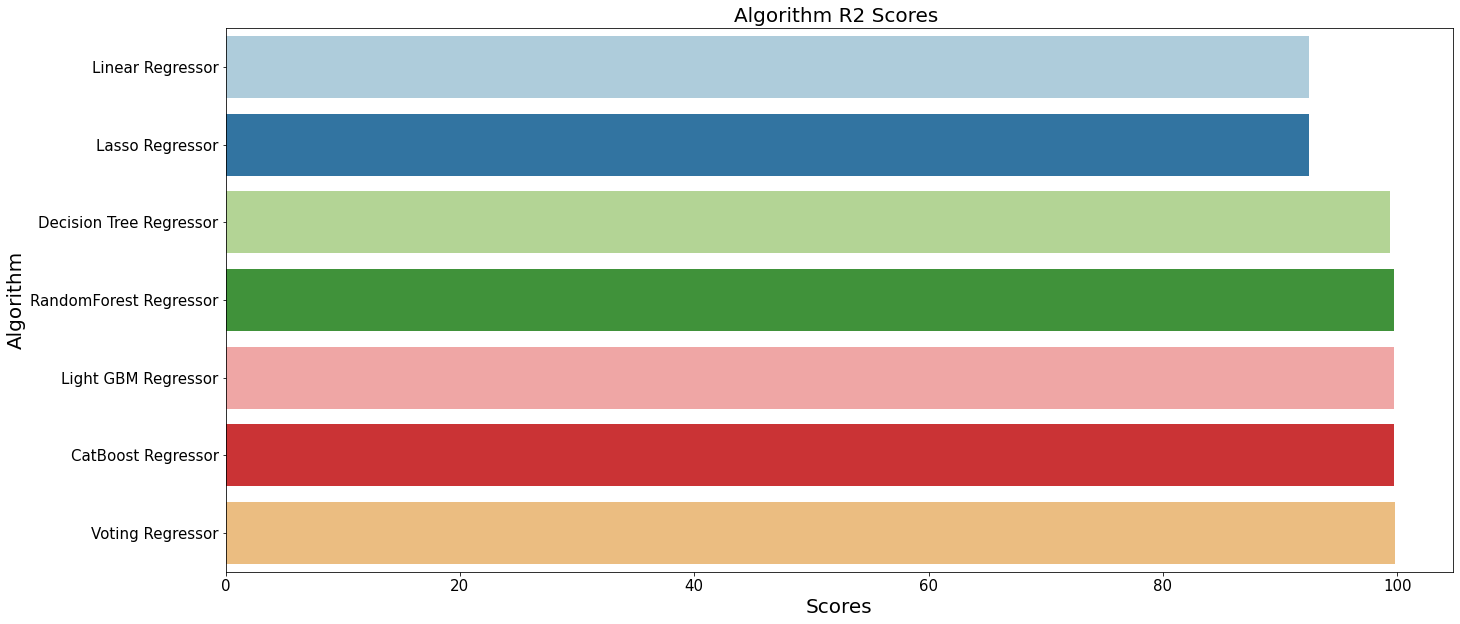

In [138]:
fig = plt.figure(figsize=(22, 10))
ax = fig.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(y=df_score.Algorithm, x=df_score['R2'], palette= "Paired")

# Set axis label properties
ax.set_xlabel('Scores', weight='normal', size=20)
ax.set_ylabel('Algorithm', weight='normal', size=20)
plt.title('Algorithm R2 Scores ', fontsize=20)
# Set tick label properties
ax.tick_params('x', labelsize=15)
ax.tick_params('y', labelsize=15)
plt.show()

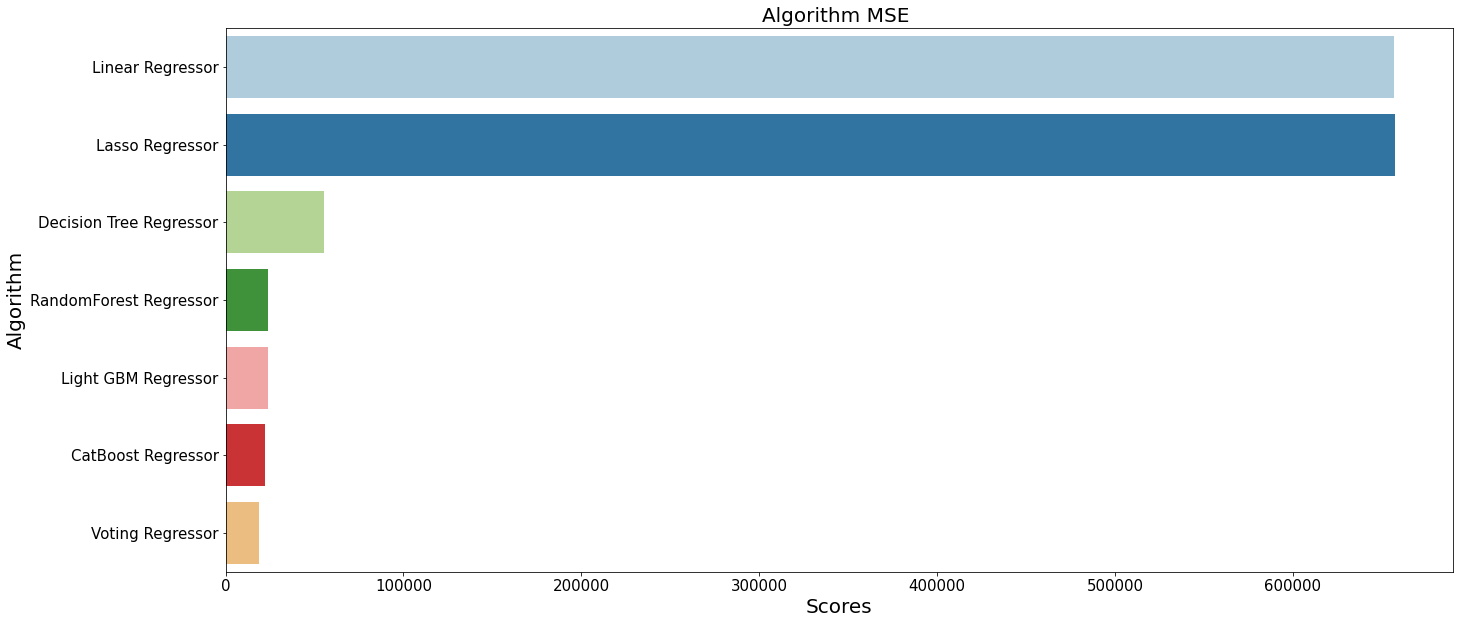

In [139]:
fig = plt.figure(figsize=(22, 10))
ax = fig.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(y=df_score.Algorithm, x=df_score['MSE'], palette= "Paired")

# Set axis label properties
ax.set_xlabel('Scores', weight='normal', size=20)
ax.set_ylabel('Algorithm', weight='normal', size=20)
plt.title('Algorithm MSE ', fontsize=20)
# Set tick label properties
ax.tick_params('x', labelsize=15)
ax.tick_params('y', labelsize=15)
plt.show()

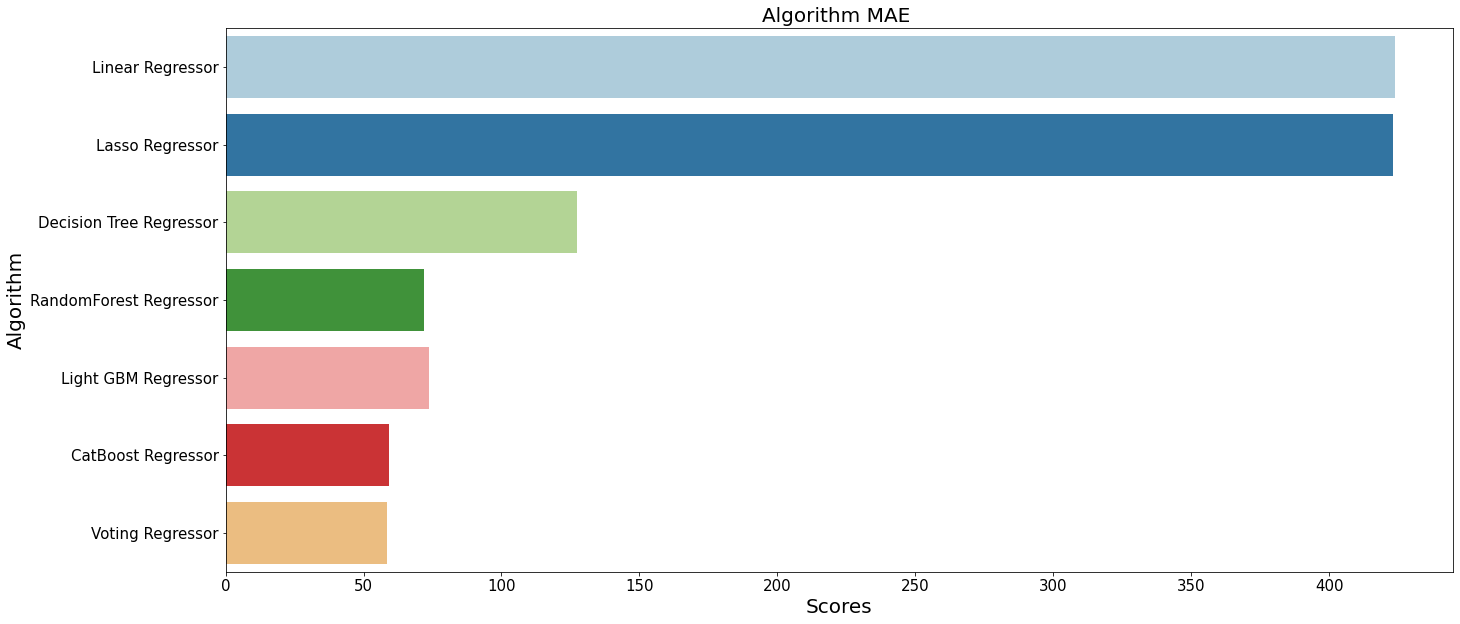

In [140]:
fig = plt.figure(figsize=(22, 10))
ax = fig.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(y=df_score.Algorithm, x=df_score['MAE'], palette= "Paired")

# Set axis label properties
ax.set_xlabel('Scores', weight='normal', size=20)
ax.set_ylabel('Algorithm', weight='normal', size=20)
plt.title('Algorithm MAE ', fontsize=20)
# Set tick label properties
ax.tick_params('x', labelsize=15)
ax.tick_params('y', labelsize=15)
plt.show()

## Download Submission File

In [ ]:
# submission_file = pd.DataFrame([test_Product_id , vr_pred]).T

In [ ]:
# submission_file.columns = ['Product_id', 'Selling_Price']

In [ ]:
# submission_file.to_csv("Submission.csv",index=False)

In [141]:
## Scores on HackerEarth
# 2 - 89.34
# 3-  89.61169
# 4 - 89.90397
# 5 - 89.84823
# 6 - 90.02393 [Closing Score]